In [1]:
import os
import sys
import lmfit as lm
import logging
# import glob
# import time
# import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Custom packages
import iXAtom_Class_Physics       as iXC_Physics
import iXAtom_Class_RunParameters as iXC_RunPars
import iXAtom_Class_Detector      as iXC_Detect
import iXAtom_Class_Ramsey        as iXC_Ramsey
import iXAtom_Utilities           as iXUtils

# For inline plots
%matplotlib inline
# Reload IPython extension 'autoreload'
%reload_ext autoreload
# autoreload: Reload all modules (except those excluded by %aimport) automatically now
# autoreload 0: Disable automatic reloading of modules
# autoreload 1: Reload all modules imported with %aimport every time before executing
# autoreload 2: Reload all modules (except those excluded by %aimport) every time before executing
%autoreload 1

%aimport iXAtom_Class_Physics
%aimport iXAtom_Class_RunParameters
%aimport iXAtom_Class_Detector
%aimport iXAtom_Class_Ramsey
%aimport iXAtom_Utilities

logging.disable(level=logging.NOTSET)

iXUtils.SetDefaultPlotOptions()

In [2]:
# RootDir = 'C:\\iXAtom Desktop\\Data 2020'
RootDir = 'C:\\Bryns Goodies\\Work-iXAtom\\Data 2020'
Date    = {'Month': 'October', 'Day': 23}
WorkDir = os.path.join(RootDir, Date['Month'], '{:02d}'.format(Date['Day']))
Folder  = 'Raman'
RunNum  = 1

RunPars = iXC_RunPars.RunParameters(WorkDir, Folder, RunNum)
RunPars.LoadRunParameters()

Physics = iXC_Physics.Physics(RunPars)
iaxList = RunPars.iaxList
ikList  = RunPars.ikList
keff    = RunPars.keff
gLocal  = RunPars.gLocal

def Gauss(r, A, r0, sigma):
    return A*np.exp(-((r-r0)/sigma)**2)

GModel = lm.Model(Gauss)

pd.DataFrame(RunPars.__dict__.items())

,0,1
0,SoftwareVersion,3.4
1,Run,1
2,DataType,Raman
3,TrackProtocol,Two-Point kInterlaced
4,TrackMode,"Closed Loop, RT Chirp"
...,...,...
102,nk,2
103,nax,2
104,FilePrefix,Raman
105,AxisFileLabels,"[[X-kU, X-kD], [Y-kU, Y-kD], [Z-kU, Z-kD]]"


{'Month': 'October', 'Day': 22} , iax =  1 , T =  2.5 , File =  Data-yAxis-T=2.5ms-RTon_1.txt
{'Month': 'October', 'Day': 22} , iax =  2 , T =  2.5 , File =  Data-zAxis-T=2.5ms-RTon_1.txt
{'Month': 'October', 'Day': 23} , iax =  1 , T =  2.5 , File =  Data-yAxis-T=2.5ms-RTon_2.txt
{'Month': 'October', 'Day': 23} , iax =  2 , T =  2.5 , File =  Data-zAxis-T=2.5ms-RTon_2.txt
{'Month': 'October', 'Day': 22} , iax =  1 , T =  5.0 , File =  Data-yAxis-T=5.0ms-RTon_1.txt
{'Month': 'October', 'Day': 22} , iax =  2 , T =  5.0 , File =  Data-zAxis-T=5.0ms-RTon_1.txt
{'Month': 'October', 'Day': 23} , iax =  1 , T =  5.0 , File =  Data-yAxis-T=5.0ms-RTon_2.txt
{'Month': 'October', 'Day': 23} , iax =  2 , T =  5.0 , File =  Data-zAxis-T=5.0ms-RTon_2.txt
{'Month': 'October', 'Day': 23} , iax =  1 , T =  10.0 , File =  Data-yAxis-T=10.0ms-RTon.txt
{'Month': 'October', 'Day': 23} , iax =  2 , T =  10.0 , File =  Data-zAxis-T=10.0ms-RTon.txt
{'Month': 'October', 'Day': 23} , iax =  2 , T =  10.0 , Fil

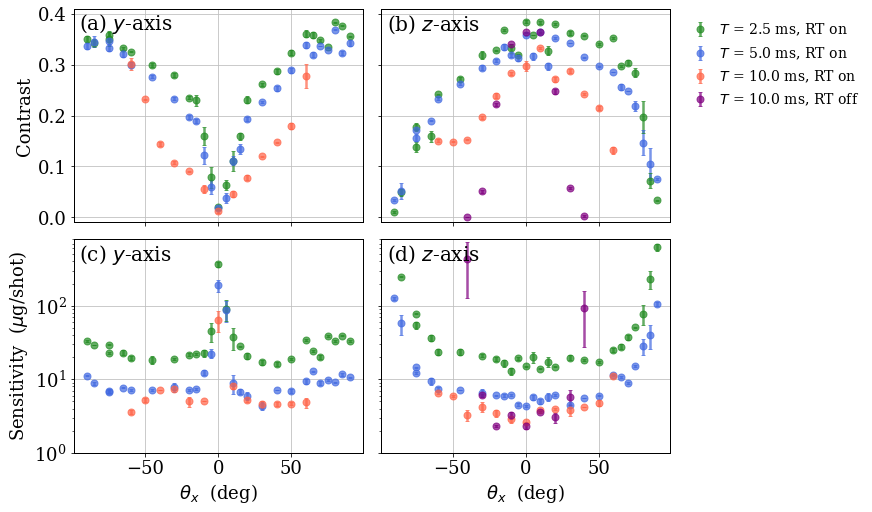

In [11]:
#========================================================================================= 
#  Plot analysis summary results for specific runs on specific days
#=========================================================================================
## Set plot options
plt.rc('font', size=18, family='serif')
plt.rc('axes', titlesize=16, labelsize=18, edgecolor='black', linewidth=1)
plt.rc('lines', linewidth=2.5, markersize=14)
plt.rc('legend', fontsize=14, frameon=False, handletextpad=0.4)

DateList = [
    {'Month': 'October', 'Day': 22}, {'Month': 'October', 'Day': 23}, {'Month': 'October', 'Day': 22},
    {'Month': 'October', 'Day': 23}, {'Month': 'October', 'Day': 23}, {'Month': 'October', 'Day': 23}]
    # {'Month': 'October', 'Day': 23}, {'Month': 'October', 'Day': 23}]
RunLists = [[5,35], [17,37], [6,36], [18,38], [3,16], [41,65]]
    # [39,63], [40,64]]

OutputDir = 'C:\\Bryns Goodies\\Dropbox\\Python Code\\iXAtom Analysis\\Figure 3\\Data\\'
OutputFiles = [
    'Data-yAxis-T=2.5ms-RTon_1.txt', 'Data-zAxis-T=2.5ms-RTon_1.txt',
    'Data-yAxis-T=2.5ms-RTon_2.txt', 'Data-zAxis-T=2.5ms-RTon_2.txt',
    'Data-yAxis-T=5.0ms-RTon_1.txt', 'Data-zAxis-T=5.0ms-RTon_1.txt',
    'Data-yAxis-T=5.0ms-RTon_2.txt', 'Data-zAxis-T=5.0ms-RTon_2.txt',
    'Data-yAxis-T=10.0ms-RTon.txt', 'Data-zAxis-T=10.0ms-RTon.txt',
    'Data-zAxis-T=10.0ms-RToff.txt']

nRuns    = len(RunLists)
Colors   = [
    'forestgreen', 'forestgreen', 'royalblue', 'royalblue', 'tomato', 'purple']
    #'darkorange', 'orange', 'purple', 'chocolate']
    #'black', 'gray']

nRows, nCols = (2,2)
fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols*6,nRows*3.5), constrained_layout=True, sharex='col', sharey='row')

f = -1
for r in range(nRuns):
    RunList = RunLists[r]
    WorkDir = os.path.join(RootDir, DateList[r]['Month'], '{:02d}'.format(DateList[r]['Day']))
    RunPars = iXC_RunPars.RunParameters(WorkDir, Folder, RunList[0])
    RunPars.LoadRunParameters()

    iaxList = RunPars.iaxList
    ikList  = RunPars.ikList
    RamanT  = RunPars.RamanT

    Physics = iXC_Physics.Physics(RunPars)

    SummaryFolder     = os.path.join(WorkDir, 'PostProcessed', Folder)
    SummaryFilePrefix = Folder + '-Runs{:02d}-{:02d}-AnalysisSummary-'.format(min(RunList), max(RunList))
    SummaryFilePaths  = [[os.path.join(SummaryFolder, SummaryFilePrefix + RunPars.AxisFileLabels[iax][ik] + '.txt') for ik in range(2)] for iax in range(3)]

    SummaryDF = [[pd.DataFrame([]) for ik in range(2)] for iax in range(3)]

    ## Default plot options
    PlotOpts = {'Color': Colors[r], 'Linestyle': 'None', 'Marker': '.',
        'Title': 'None', 'xLabel': 'None', 'yLabel': 'None',
        'LegLabel': 'None', 'Legend': False, 'LegLocation': 'best'}

    for iax in iaxList:
        if iax == 2:
            iCol = 1
        else:
            iCol = 0

        for ik in ikList:
            if os.path.exists(SummaryFilePaths[iax][ik]):
                SummaryDF[iax][ik] = pd.read_csv(SummaryFilePaths[iax][ik], sep='\t')
            else:
                print('Summary file not found: {}'.format(SummaryFilePaths[iax][ik]))

        TiltX = np.arcsin(np.sin(np.pi/180*SummaryDF[iax][0]['TiltX'].to_numpy()))*180/np.pi
        nData = len(TiltX)

        C_kU = SummaryDF[iax][0]['Contrast'].to_numpy()
        C_kD = SummaryDF[iax][1]['Contrast'].to_numpy()
        C    = 0.5*(C_kU + C_kD)
        # dC = 0.5*np.sqrt(SummaryDF[iax][0]['Contrast_Err'].to_numpy()**2 + SummaryDF[iax][1]['Contrast_Err'].to_numpy()**2)
        dC   = np.array([np.std([C_kU[i],C_kD[i]])/np.sqrt(2) for i in range(nData)])

        SNR_kU = 0.5*SummaryDF[iax][0]['SNR'].to_numpy() ## factor of 1/2 corrects formula to: SNR = Contrast/(2*std(residuals))
        SNR_kD = 0.5*SummaryDF[iax][1]['SNR'].to_numpy()
        SNR    = 0.5*(SNR_kU + SNR_kD)
        dSNR   = np.array([np.std([SNR_kU[i],SNR_kD[i]])/np.sqrt(2) for i in range(nData)])

        siga   = 1/(SNR*keff*RamanT**2) ## [m/s^2]
        dsiga  = dSNR/SNR*siga

        # sigX_kU = SummaryDF[iax][0]['sigX'].to_numpy()
        # sigX_kD = SummaryDF[iax][1]['sigX'].to_numpy()
        # sigX    = 0.5*(sigX_kU + sigX_kD)
        # dsigX   = np.array([np.std([sigX_kU[i],sigX_kD[i]])/np.sqrt(2) for i in range(nData)])

        # siga   = sigX/(keff*RamanT**2) ## [m/s^2]
        # dsiga  = dsigX*siga

        d = {}
        d['TiltX'] = TiltX
        d['C'] = C
        d['C_Err'] = dC
        d['SNR'] = SNR
        d['SNR_Err'] = dSNR
        d['siga'] = siga
        d['siga_Err'] = dsiga

        f += 1
        print(DateList[r], ', iax = ', iax, ', T = ', RamanT*1.E3, ', File = ', OutputFiles[f])
        OutputDF = pd.DataFrame(data=d)
        OutputDF.to_csv(os.path.join(OutputDir, OutputFiles[f]), sep='\t', float_format='%.6E', header=True, index=False)

        PlotOpts['xLabel'] = 'None'
        if iCol == 0:
            PlotOpts['yLabel'] = 'Contrast'
        else:
            PlotOpts['yLabel'] = 'None'

        if DateList[r]['Day'] == 22:
            PlotOpts['LegLabel'] = r'$T$ = {:.1f} ms, RT on'.format(RamanT*1.E3)
        elif DateList[r]['Day'] == 23 and RunLists[r] == [3,16]:
            PlotOpts['LegLabel'] = r'$T$ = {:.1f} ms, RT on'.format(RamanT*1.E3)
        elif DateList[r]['Day'] == 23 and RunLists[r] == [41,65]:
            PlotOpts['LegLabel'] = r'$T$ = {:.1f} ms, RT off'.format(RamanT*1.E3)
        else:
            PlotOpts['LegLabel'] = None
        iXUtils.CustomPlot(axs[0,iCol], PlotOpts, TiltX, C, dC)

        PlotOpts['xLabel'] = r'$\theta_x$  (deg)'
        if iCol == 0:
            # PlotOpts['yLabel'] = 'SNR'
            PlotOpts['yLabel'] = r'Sensitivity  ($\mu$g/shot)'
        else:
            PlotOpts['yLabel'] = 'None'

        # iXUtils.CustomPlot(axs[1,iCol], PlotOpts, TiltX, SNR, dSNR)
        iXUtils.CustomPlot(axs[1,iCol], PlotOpts, TiltX, siga*1.E6/gLocal, dsiga*1.E6/gLocal)

        if iCol == nCols-1:
            # axs[iRow,iCol].legend(loc='upper left', bbox_to_anchor=(1.01,1.0))
            axs[0,iCol].legend(loc='upper left', bbox_to_anchor=(1.01,1.0))
            # axs[1,iCol].legend(loc='upper left', bbox_to_anchor=(1.01,1.0))

# axs[0,0].set_xlim(-100.,100.)
# axs[0,1].set_xlim(-100.,100.)

axs[0,0].set_ylim(-0.01,0.41)
# axs[0,1].set_ylim(-0.01,0.41)

# axs[1,0].set_ylim(-5,165)
# axs[1,1].set_ylim(-5,165)

axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')

axs[1,0].set_ylim(1,800)
axs[1,1].set_ylim(1,800)

axs[0,0].annotate(r'(a) $y$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')
axs[0,1].annotate(r'(b) $z$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')
axs[1,0].annotate(r'(c) $y$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')
axs[1,1].annotate(r'(d) $z$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')

# plotPath = 'C:\\Bryns Goodies\\Dropbox\\Papers\\Paper - 3D Accelerometer\\Figures\\Contrast-vs-Tilt_v2.pdf'
# plt.savefig(plotPath, dpi=150)

plt.show()

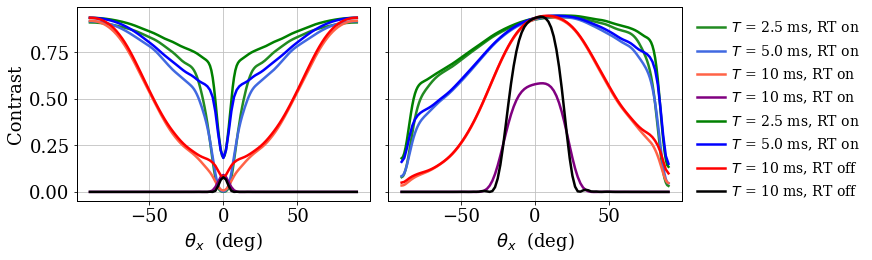

In [10]:
ContrastFolder = 'C:\\Bryns Goodies\\Dropbox\\Python Code\\iXAtom Analysis\\Contrast Model\\'
TList = [2.5, 5.0, 10.0, 10.0, 2.5, 5.0, 10.0, 10.0]
iaxLabels = ['X','Y','Z']
ikLabels = ['kU', 'kD']
Files  = ['Contrast-T={:.1f}ms-RTOn-kCo-{}-{}-vs-TiltX.txt', 'Contrast-T={:.1f}ms-RTOn-kCo-{}-{}-vs-TiltX.txt',
		'Contrast-T={:.1f}ms-RTOn-kCo-{}-{}-vs-TiltX.txt', 'Contrast-T={:.1f}ms-RTOff-vAvg-{}-{}-vs-TiltX.txt', 
		'Contrast-T={:.1f}ms-RTOn-{}-{}-vs-TiltX.txt', 'Contrast-T={:.1f}ms-RTOn-{}-{}-vs-TiltX.txt',
		'Contrast-T={:.1f}ms-RTOn-{}-{}-vs-TiltX.txt', 'Contrast-T={:.1f}ms-RTOff-{}-{}-vs-TiltX.txt']
iaxList = [1,2]
ikList = [0,1]
nax    = len(iaxList)
nFiles = len(Files)

Paths  = [[[os.path.join(ContrastFolder, Files[f].format(TList[f], iaxLabels[iax], ikLabels[ik])) for f in range(nFiles)] for ik in ikList] for iax in iaxList]
dfList = [[[pd.DataFrame([]) for _ in range(nFiles)] for _ in ikList] for _ in iaxList]

Colors = ['forestgreen', 'royalblue', 'tomato', 'purple', 'green', 'blue', 'red', 'black']

nRows, nCols = (1,2)
fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols*6,nRows*3.5), constrained_layout=True, sharex='col', sharey='row')

## Default plot options
PlotOpts = {'Color': 'red', 'Linestyle': '-', 'Marker': 'None',
	'Title': 'None', 'xLabel': r'$\theta_x$  (deg)', 'yLabel': 'None',
	'LegLabel': 'None', 'Legend': False, 'LegLocation': 'best'}

for f in range(nFiles):
	for iiax in range(nax):
		if os.path.exists(Paths[iiax][0][f]) and os.path.exists(Paths[iiax][1][f]):
			dfList[iiax][0][f] = pd.read_csv(Paths[iiax][0][f], sep='\t')
			dfList[iiax][1][f] = pd.read_csv(Paths[iiax][1][f], sep='\t')

			TiltX = dfList[iiax][0][f]['TiltX'].to_numpy()
			C  = 0.5*(dfList[iiax][0][f]['Contrast'].to_numpy() + dfList[iiax][1][f]['Contrast'].to_numpy())
			dC = 0.5*np.sqrt(dfList[iiax][0][f]['dContrast'].to_numpy()**2 + dfList[iiax][1][f]['dContrast'].to_numpy()**2)

			nData = len(TiltX)

			if iiax == 0:
				PlotOpts['yLabel'] = 'Contrast'
			else:
				PlotOpts['yLabel'] = 'None'

			if f < nFiles-1 and TList[f] < 10:
				PlotOpts['LegLabel'] = r'$T$ = {:.1f} ms, RT on'.format(TList[f])
			elif f < nFiles-2:
				PlotOpts['LegLabel'] = r'$T$ = {:.0f} ms, RT on'.format(TList[f])
			else:
				PlotOpts['LegLabel'] = r'$T$ = {:.0f} ms, RT off'.format(TList[f])

			PlotOpts['Color'] = Colors[f]
				
			iXUtils.CustomPlot(axs[iiax], PlotOpts, TiltX, C)
			# axs[iiax].fill_between(TiltX, C - dC, C + dC, color=Colors[f], alpha=0.5)

		else:
			print('Contrast file(s) not found: {}, {}'.format(Paths[iax][0][f], Paths[iax][1][f]))

axs[1].legend(loc='upper left', bbox_to_anchor=(1.01,1.0))

plt.show()

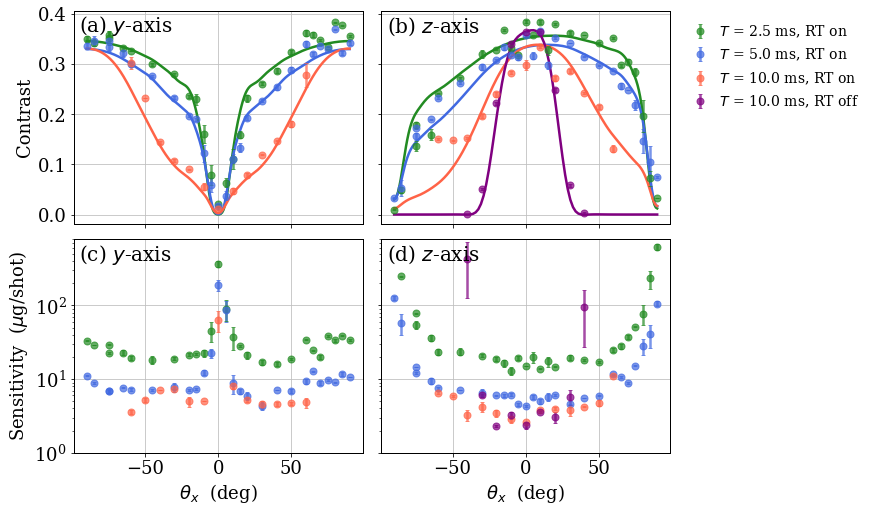

In [13]:
nRows, nCols = (2,2)
fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols*6,nRows*3.5), constrained_layout=True, sharex='col', sharey='row')

## Default plot options
PlotOpts = {'Color': 'red', 'Linestyle': '-', 'Marker': 'None',
	'Title': 'None', 'xLabel': 'None', 'yLabel': 'None',
	'LegLabel': None, 'Legend': False, 'LegLocation': 'best'}

nFiles = 4
Colors = ['forestgreen', 'royalblue', 'tomato', 'purple']
CScale = [0.38, 0.36, 0.36, 0.63]

for f in range(nFiles):
    for iiax in range(nax):
        dfList[iiax][0][f] = pd.read_csv(Paths[iiax][0][f], sep='\t')
        dfList[iiax][1][f] = pd.read_csv(Paths[iiax][1][f], sep='\t')

        TiltX = dfList[iiax][0][f]['TiltX'].to_numpy()
        C  = 0.5*(dfList[iiax][0][f]['Contrast'].to_numpy() + dfList[iiax][1][f]['Contrast'].to_numpy())
        dC = 0.5*np.sqrt(dfList[iiax][0][f]['dContrast'].to_numpy()**2 + dfList[iiax][1][f]['dContrast'].to_numpy()**2)

        PlotOpts['Color'] = Colors[f]

        if f < nFiles-1 or iiax == 1:
            iXUtils.CustomPlot(axs[0,iiax], PlotOpts, TiltX, CScale[f]*C)
            # axs[0,iiax].fill_between(TiltX, CScale[f]*(C-dC), CScale[f]*(C+dC), color=Colors[f], alpha=0.5)

## Default plot options
PlotOpts = {'Color': 'red', 'Linestyle': 'None', 'Marker': '.',
    'Title': 'None', 'xLabel': 'None', 'yLabel': 'None',
    'LegLabel': 'None', 'Legend': False, 'LegLocation': 'best'}

Colors   = ['forestgreen', 'forestgreen', 'royalblue', 'royalblue', 'tomato', 'purple']

for r in range(nFiles+2):
    RunList = RunLists[r]
    WorkDir = os.path.join(RootDir, DateList[r]['Month'], '{:02d}'.format(DateList[r]['Day']))
    RunPars = iXC_RunPars.RunParameters(WorkDir, Folder, RunList[0])
    RunPars.LoadRunParameters()

    iaxList = RunPars.iaxList
    ikList  = RunPars.ikList
    RamanT  = RunPars.RamanT

    Physics = iXC_Physics.Physics(RunPars)

    SummaryFolder     = os.path.join(WorkDir, 'PostProcessed', Folder)
    SummaryFilePrefix = Folder + '-Runs{:02d}-{:02d}-AnalysisSummary-'.format(min(RunList), max(RunList))
    SummaryFilePaths  = [[os.path.join(SummaryFolder, SummaryFilePrefix + RunPars.AxisFileLabels[iax][ik] + '.txt') for ik in range(2)] for iax in range(3)]

    SummaryDF = [[pd.DataFrame([]) for ik in range(2)] for iax in range(3)]

    for iax in iaxList:
        if iax == 2:
            iCol = 1
        else:
            iCol = 0

        for ik in ikList:
            if os.path.exists(SummaryFilePaths[iax][ik]):
                SummaryDF[iax][ik] = pd.read_csv(SummaryFilePaths[iax][ik], sep='\t')
            else:
                print('Summary file not found: {}'.format(SummaryFilePaths[iax][ik]))

        TiltX = np.arcsin(np.sin(np.pi/180*SummaryDF[iax][0]['TiltX'].to_numpy()))*180/np.pi
        nData = len(TiltX)

        C_kU = SummaryDF[iax][0]['Contrast'].to_numpy()
        C_kD = SummaryDF[iax][1]['Contrast'].to_numpy()
        C    = 0.5*(C_kU + C_kD)
        dC   = np.array([np.std([C_kU[i],C_kD[i]])/np.sqrt(2) for i in range(nData)])

        SNR_kU = 0.5*SummaryDF[iax][0]['SNR'].to_numpy() ## factor of 1/2 corrects formula to: SNR = Contrast/(2*std(residuals))
        SNR_kD = 0.5*SummaryDF[iax][1]['SNR'].to_numpy()
        SNR    = 0.5*(SNR_kU + SNR_kD)
        dSNR   = np.array([np.std([SNR_kU[i],SNR_kD[i]])/np.sqrt(2) for i in range(nData)])
        siga   = 1/(SNR*keff*RamanT**2) ## [m/s^2]
        dsiga  = dSNR/SNR*siga

        PlotOpts['xLabel'] = 'None'
        PlotOpts['Color']  = Colors[r]
        if iCol == 0:
            PlotOpts['yLabel'] = 'Contrast'
        else:
            PlotOpts['yLabel'] = 'None'

        if DateList[r]['Day'] == 22:
            PlotOpts['LegLabel'] = r'$T$ = {:.1f} ms, RT on'.format(RamanT*1.E3)
        elif DateList[r]['Day'] == 23 and RunLists[r] == [3,16]:
            PlotOpts['LegLabel'] = r'$T$ = {:.1f} ms, RT on'.format(RamanT*1.E3)
        elif DateList[r]['Day'] == 23 and RunLists[r] == [41,65]:
            PlotOpts['LegLabel'] = r'$T$ = {:.1f} ms, RT off'.format(RamanT*1.E3)
        else:
            PlotOpts['LegLabel'] = None
        iXUtils.CustomPlot(axs[0,iCol], PlotOpts, TiltX, C, dC)

        PlotOpts['xLabel'] = r'$\theta_x$  (deg)'
        if iCol == 0:
            PlotOpts['yLabel'] = r'Sensitivity  ($\mu$g/shot)'
        else:
            PlotOpts['yLabel'] = 'None'

        iXUtils.CustomPlot(axs[1,iCol], PlotOpts, TiltX, siga*1.E6/gLocal, dsiga*1.E6/gLocal)


# axs[0,0].set_xlim(-100.,100.)
# axs[0,1].set_xlim(-100.,100.)

# axs[0,0].set_ylim(-0.01,0.41)
# axs[0,1].set_ylim(-0.01,0.41)

# axs[1,0].set_ylim(-5,165)
# axs[1,1].set_ylim(-5,165)

axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')

axs[1,0].set_ylim(1,800)
axs[1,1].set_ylim(1,800)

axs[0,0].annotate(r'(a) $y$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')
axs[0,1].annotate(r'(b) $z$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')
axs[1,0].annotate(r'(c) $y$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')
axs[1,1].annotate(r'(d) $z$-axis', xy=(0.02, 0.9), fontsize=20, xycoords='axes fraction')

axs[0,1].legend(loc='upper left', bbox_to_anchor=(1.01,1.0))

# plotPath = 'C:\\Bryns Goodies\\Dropbox\\Papers\\Paper - 3D Accelerometer\\Figures\\Contrast-vs-Tilt_v3.pdf'
# plotPath = 'C:\\Bryns Goodies\\Dropbox\\Apps\\Overleaf\\Tracking the vector acceleration with a 3D hybrid quantum accelerometer\\Figures\\Contrast-vs-Tilt_v3.pdf'
plotPath = 'C:\\Bryns Goodies\\Dropbox\\Apps\\Overleaf\\Tracking the Vector Acceleration with a Hybrid Quantum Accelerometer Triad\\Figures\\Contrast-vs-Tilt_v3.png'
plt.savefig(plotPath, dpi=150)

plt.show()

In [43]:
print(TiltX)
print(1/(SNR*gLocal*keff*RamanT**2))


[ 30.  40.  50. -50.  60. -30. -40.   0.  10. -60. -20. -10.  20.]
[3.81024702e-06 4.20373718e-06 4.78495335e-06 5.85235281e-06
 1.11865779e-05 4.21501692e-06 3.26868485e-06 2.60207781e-06
 3.76396953e-06 6.56892060e-06 3.44600267e-06 2.83836334e-06
 3.97511974e-06]
